In [18]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [19]:
"""!pip install torch_geometric
!pip install pymatreader"""

'!pip install torch_geometric\n!pip install pymatreader'

### Preparing Dataset

### Making Dataset from .mat file to .csv and saving

In [ ]:
import pandas as pd
import numpy as np
from pymatreader import read_mat
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import os

#data_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/gait-analysis-main_VT/AI_Frailty-MATLAB/AI_Frailty-MATLAB'


data_path = "/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Data/Kinect-ACC-Cleaned/"
saving_path="/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Output Data/Kinect Data/"





def KINZ_DATA_np(k):

  details = os.path.basename(k)

  p_id= details.split("_")[0].split("-")[-2]+"-"+ details.split("_")[0].split("-")[-1]
  traial = details.split("_")[1]
  walking_speed = details.split("_")[2]

  kinzData = read_mat(k)

  kinz_arr = np.empty([0,100])


  for i in range(len(kinzData["joint_positions"])):
      timeStamps = np.array(kinzData["t_uniform"][i])
      kinz_x = kinzData["joint_positions"][i][0]
      kinz_y = kinzData["joint_positions"][i][1]
      kinz_z = kinzData["joint_positions"][i][2]

      d = np.concatenate((p_id,traial,walking_speed,timeStamps,kinz_x,kinz_y,kinz_z), axis=None)

      kinz_arr = np.append(kinz_arr, [d], axis=0)

  return kinz_arr







final = np.empty([0,100])

for i in tqdm(sorted(glob(data_path+"/*"))):
  for k in sorted(glob(i+"/TS*.mat")):
    print("Processing: ", os.path.basename(k))
    temp_single = KINZ_DATA_np(k)
    #time_elements = temp_single[:, 3]

    #time_elements = time_elements.astype(float)
    #replacement_values = kinz_time(time_elements)[0]

    #temp_single[:, 3] = replacement_values
    final = np.append(final, temp_single, axis=0)


joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]


all_columns = ['patientID','trial_num','walking_speed','timeStamps']


for joint in joints:
  x = f'{joint}_X'
  all_columns.append(x)

for joint in joints:
  y = f'{joint}_Y'
  all_columns.append(y)

for joint in joints:
  z = f'{joint}_Z'
  all_columns.append(z)




final_df = pd.DataFrame(final, columns=all_columns)

columns_to_convert = final_df.columns.difference(['patientID','trial_num','walking_speed'])
final_df[columns_to_convert] = final_df[columns_to_convert].astype(float)



from datetime import datetime

# Get the current timestamp
current_timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Define the file name with the timestamp
file_name = f'KINZ_JOINT_{current_timestamp}.csv'

# Save the DataFrame to the specified path with the timestamped file name
final_df.to_csv(f'{saving_path}/{file_name}', index=False)


### Marging Target column from ClinicalData

In [2]:
import pandas as pd
import numpy as np

kinz_df= pd.read_csv("/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Output Data/Kinect Data/Kinect_Joint_data_09.04.2024.csv")

clinic_df_1 = pd.read_csv("/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Clinical Data/ClinicalData80_revised.csv")

clinic_df_2 = pd.read_csv("/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Clinical Data/Phenoage_Class_BiologicalAge.txt",sep='\t')

kinz_df = kinz_df.rename(columns = {"patientID":"PatientID"})
clinic_df_1 = clinic_df_1.rename(columns = {"RecordID":"PatientID"})

In [3]:
kinz_df

,PatientID,trial_num,walking_speed,timeStamps,PELVIS_X,SPINE_NAVAL_X,SPINE_CHEST_X,NECK_X,CLAVICLE_LEFT_X,SHOULDER_LEFT_X,...,HIP_RIGHT_Z,KNEE_RIGHT_Z,ANKLE_RIGHT_Z,FOOT_RIGHT_Z,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z
0,001-LO,Trial1,Regular,0.014806,513.079538,516.003537,527.994788,545.712851,516.264630,405.175317,...,919.948335,929.656427,825.884006,894.117256,925.016797,954.213183,938.401915,886.661529,968.354628,981.439603
1,001-LO,Trial1,Regular,0.034787,518.341956,523.496677,539.288301,549.834306,520.128180,405.456134,...,934.181465,924.690502,784.109292,847.342565,961.514530,951.963861,963.009239,945.312977,991.238931,1044.996519
2,001-LO,Trial1,Regular,0.054767,529.923963,541.248914,552.630499,552.997228,524.350174,408.479201,...,980.474516,936.771136,777.246423,837.827719,987.262010,983.921111,995.232664,973.751899,1023.415136,1073.302525
3,001-LO,Trial1,Regular,0.074748,534.861455,548.038017,556.688923,551.944125,523.861126,407.510892,...,1019.964084,967.044120,802.468369,862.476378,1015.462905,1023.426646,1033.121369,1005.673693,1059.598333,1098.709654
4,001-LO,Trial1,Regular,0.094728,534.057534,545.354058,552.725394,547.248025,519.301345,403.093700,...,1053.574877,1013.036813,855.414270,916.645154,1045.783754,1069.454529,1075.905348,1040.604981,1099.243905,1121.611912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,080-TW,Trial4,Fast,6.710077,-75.513272,-91.116753,-103.032557,-113.857340,-81.431610,41.293722,...,852.466446,877.753813,1076.994394,1096.885620,691.167469,727.103133,724.091722,665.765855,760.482948,787.098138
82938,080-TW,Trial4,Fast,6.730058,-73.899128,-91.786137,-105.789961,-118.876502,-87.122933,31.064432,...,843.949724,890.880772,1081.828347,1077.171735,693.164032,723.143200,718.966678,663.865764,755.543358,785.451411
82939,080-TW,Trial4,Fast,6.750038,-72.284984,-92.455520,-108.547366,-123.895664,-92.814256,20.835141,...,835.433001,904.007731,1086.662300,1057.457850,695.160595,719.183266,713.841633,661.965672,750.603769,783.804684
82940,080-TW,Trial4,Fast,6.770019,-70.795676,-93.066990,-111.074360,-128.380647,-97.939040,11.455856,...,827.708937,916.337316,1091.584475,1040.287678,696.491535,715.211697,708.845724,659.888708,745.726696,781.801935


In [4]:
clinic_df = clinic_df_1

In [5]:
clinic_df_2

,PatientID,age,albumin,alp,glucose,creat,bun,rdw,mcv,rbc,...,GS_accel,GS_kinect,GS_stopwatch,Cadence_accel,Cadence_kinect,Torso_length,RightLeg_length,LeftLeg_length,Shoulder_width,phenoage_advance_class
0,001-LO,43,4.2,311,116,0.66,8,13.2,93.8,8.58,...,1.105018,1.455799,1.295763,122.732763,147.575232,517.283795,767.234257,760.437320,319.462734,1
1,002-RJ,77,3.3,107,80,0.63,13,15.8,88.0,5.10,...,2.444767,0.788925,0.712126,112.811420,123.966447,559.531815,816.247066,812.007559,348.053488,1
2,004-MF,54,4.3,114,86,0.80,18,14.8,83.3,8.40,...,1.271351,1.116041,3.022641,113.060158,134.846351,547.478881,802.389963,799.832348,346.434485,1
3,005-GP,46,4.9,62,107,0.94,12,12.3,89.0,6.60,...,1.044178,1.767797,1.526235,122.838938,172.742461,551.957692,811.611456,806.706177,334.908796,0
4,008-BJ,63,4.0,69,92,0.73,13,15.8,81.6,8.04,...,0.858153,1.017981,0.873709,99.160506,123.768910,571.139917,838.755151,832.084471,354.964920,1
5,009-TB,63,4.3,48,79,1.15,21,13.1,81.0,5.15,...,1.135012,1.199402,1.019752,104.309375,143.155223,576.850562,853.816073,843.293254,352.944515,0
6,010-RA,43,4.0,41,79,0.53,6,14.9,83.2,5.74,...,0.842725,1.645808,2.989479,122.814546,169.953425,492.332266,730.422111,724.628171,298.245963,0
7,011-CB,48,4.4,73,78,0.79,11,20.4,80.2,3.80,...,1.081521,1.495208,1.357546,121.523467,163.845160,514.929716,763.261977,758.349020,318.823904,1
8,012-JM,64,4.4,97,130,0.93,24,13.1,95.6,9.14,...,1.133099,1.296259,0.993095,105.737062,149.994000,592.567510,884.155734,871.218269,364.444093,1
9,015-IL,62,4.3,83,92,0.75,15,12.6,88.6,5.73,...,1.513379,1.432945,1.239961,107.853385,200.711660,602.805912,881.913343,876.696516,370.605222,0


In [6]:
clinic_df_1

,PatientID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication3Description,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,Numbness in fingers,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete
2,RM-003,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete


In [7]:
list_1 = list(kinz_df["PatientID"].unique())
list_2 = list(clinic_df_2["PatientID"].unique())

print("IN KINZ but Not in Clinical outcome",set(list_1)-set(list_2))
print("IN Clinical outcome but Not in KINZ",set(list_2)-set(list_1))

IN KINZ but Not in Clinical outcome {'059-ES', '069-CR', '024-PO', '064-SC', '021-GA', '020-MM', '022-ND', '023-PH', '014-WF', '067-MT', '037-MA', '019-ER', '072-DD', '007-LI', '068-GM', '076-AH', '013-MS', '080-TW', 'RM-003', '006-TR'}
IN Clinical outcome but Not in KINZ {'021-AG', '077-SK', '078-SM'}


In [8]:
"""
'QoR15TotalScore': 0-150
Outcome Class:
{0-89: 'Poor'
90-121: 'Moderate'
122-135: 'Good'
135-150: 'Excellent'}

{0-121: Not Good
122-150: 'Good'}
"""

value_counts_1 = clinic_df_1['QoR15TotalScore'].value_counts()
value_counts_1

0.0      7
143.0    3
93.0     3
140.0    3
100.0    3
117.0    2
124.0    2
132.0    2
142.0    2
131.0    2
138.0    2
106.0    2
133.0    2
108.0    2
111.0    2
107.0    2
135.0    2
173.0    1
119.0    1
83.0     1
94.0     1
63.0     1
134.0    1
116.0    1
109.0    1
104.0    1
85.0     1
114.0    1
113.0    1
79.0     1
47.0     1
128.0    1
98.0     1
112.0    1
28.0     1
92.0     1
102.0    1
160.0    1
90.0     1
150.0    1
51.0     1
59.0     1
126.0    1
145.0    1
141.0    1
144.0    1
129.0    1
71.0     1
120.0    1
130.0    1
118.0    1
Name: QoR15TotalScore, dtype: int64

In [9]:
conditions = [
    (clinic_df_1['QoR15TotalScore'] >= 0) & (clinic_df_1['QoR15TotalScore'] <= 110),
    (clinic_df_1['QoR15TotalScore'] >= 111) & (clinic_df_1['QoR15TotalScore'] <= 150)
]

values = [1,0]  # 0 = 'Not Good', 1 = 'Good'

clinic_df_1['QoR_class'] = np.select(conditions, values,default=np.nan)

In [10]:
clinic_df_1

,PatientID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6,QoR_class
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete,1.0
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete,1.0
2,RM-003,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete,0.0
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete,0.0
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete,0.0
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete,1.0
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete,NaN
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete,0.0


In [11]:
clinic_df[['QoR_class','QoR15TotalScore']]


,QoR_class,QoR15TotalScore
0,1.0,93.0
1,1.0,93.0
2,0.0,117.0
3,0.0,143.0
4,0.0,124.0
...,...,...
74,0.0,142.0
75,1.0,0.0
76,NaN,NaN
77,0.0,111.0


In [12]:

value_counts = clinic_df['QoR_class'].value_counts()
value_counts

0.0    40
1.0    35
Name: QoR_class, dtype: int64

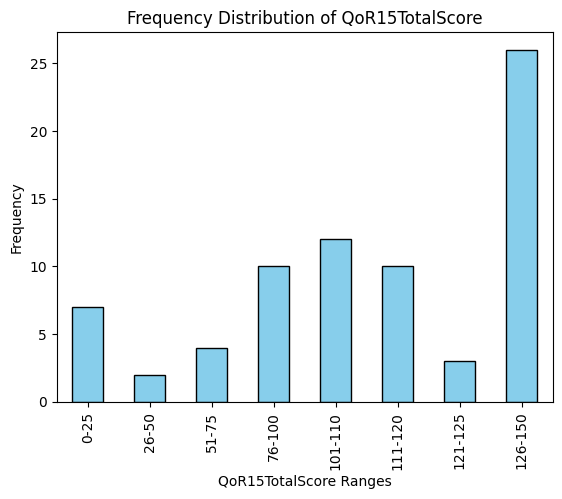

In [18]:
"""import pandas as pd
import matplotlib.pyplot as plt

# Define the bins and labels
bins = [0, 25, 50, 75, 100, 110, 120, 125, 150]
labels = ['0-25', '26-50', '51-75', '76-100', '101-110','111-120','121-125', '126-150']

# Create a new column with the defined bins
clinic_df_1['Score_Range'] = pd.cut(clinic_df_1['QoR15TotalScore'], bins=bins, labels=labels, right=False)

# Plot the frequency distribution
clinic_df_1['Score_Range'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('QoR15TotalScore Ranges')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of QoR15TotalScore')
plt.show()"""

In [13]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []

class_col = "QoR_class"



for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["PatientID"]==sub][class_col]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)




new_target_name = "QoR_class"

df = pd.DataFrame(kinz_np, columns=kinz_df.columns.to_list()+[new_target_name])







100%|██████████| 82942/82942 [00:54<00:00, 1525.49it/s]


In [14]:
len(set(df["PatientID"]))

70

In [16]:
set(df[df['QoR_class'].isna()]["PatientID"])

{'015-IL', '048-TT'}

In [17]:
set(not_found_sub)

{'021-GA', '080-TW', 'RM-003'}

#### Run this cell if you want replace some value. Otherwise do not run it. This is a defalut code for frailty_score

In [ ]:
#replace_values = {0.0:0 ,1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1}

### Dataframe with Target Column

In [ ]:

#df[new_target_name] = df[new_target_name].replace(replace_values)

### Class_Subjectwise_Dividation

In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Separate the data by frailty_class
class_0 = df[df[new_target_name] == 0.0]
class_1 = df[df[new_target_name] == 1.0]

# Group by 'patientID' and sample patients
class_0_patient_ids = class_0['PatientID'].unique()
class_1_patient_ids = class_1['PatientID'].unique()

# Determine the number of patients to sample
num_patients = min(len(class_0_patient_ids), len(class_1_patient_ids))

# Sample patients
sampled_class_0_patient_ids = class_0_patient_ids[:num_patients]
sampled_class_1_patient_ids = class_1_patient_ids[:num_patients]

# Filter the data to only include the sampled patients
sampled_class_0 = class_0[class_0['PatientID'].isin(sampled_class_0_patient_ids)]
sampled_class_1 = class_1[class_1['PatientID'].isin(sampled_class_1_patient_ids)]

# Combine the balanced classes
balanced_df = pd.concat([sampled_class_0, sampled_class_1])

# Shuffle the DataFrame to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of patients in class 0: {len(sampled_class_0_patient_ids)}")
print(f"Number of patients in class 1: {len(sampled_class_1_patient_ids)}")


Number of patients in class 0: 30
Number of patients in class 1: 30


In [20]:
len(class_0_patient_ids)

35

In [21]:
balanced_df

,PatientID,trial_num,walking_speed,timeStamps,PELVIS_X,SPINE_NAVAL_X,SPINE_CHEST_X,NECK_X,CLAVICLE_LEFT_X,SHOULDER_LEFT_X,...,KNEE_RIGHT_Z,ANKLE_RIGHT_Z,FOOT_RIGHT_Z,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,QoR_class
0,059-ES,Trial2,Regular,5.251643,-291.327561,-288.412,-286.638678,-281.324662,-250.505689,-123.751947,...,1874.764681,2122.011864,2079.298493,1591.408783,1440.181775,1458.58493,1559.573468,1458.265091,1567.348018,1.0
1,014-WF,Trial2,Regular,3.108898,752.282287,741.346508,731.84374,717.541766,758.381506,921.172117,...,4712.568418,5083.33789,5145.371843,4565.211529,4414.69862,4418.537516,4526.566279,4405.847683,4486.989971,0.0
2,040-KR,Trial4,Fast,3.002045,-8.531094,-4.111767,1.145545,-6.411918,-41.5431,-191.979521,...,3543.47811,3627.111094,3718.951069,3150.604941,3261.007859,3239.751996,3192.752112,3209.60473,3081.474876,1.0
3,033-JF,Trial3,Regular,5.655508,296.569127,304.086912,310.346789,312.813829,344.319584,472.262721,...,932.833283,1124.020369,1080.420424,860.090646,903.890604,942.06279,949.667164,917.180528,879.673882,1.0
4,006-TR,Trial2,Regular,0.085075,236.447282,206.793381,186.146276,171.804229,210.297114,359.117165,...,7787.972901,8015.240244,7949.620392,7508.888962,7329.617216,7356.270827,7481.296939,7351.848017,7478.703669,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68111,006-TR,Trial2,Regular,4.58068,255.179402,253.201048,252.24659,258.221424,292.201905,433.371942,...,2573.523229,2879.086706,2828.07984,2348.252537,2213.495545,2212.204188,2302.475683,2206.112109,2283.033001,1.0
68112,012-JM,Trial1,Regular,0.271664,438.618391,420.717852,405.812654,365.913406,343.337307,230.320254,...,1208.320505,1152.711069,1258.766933,994.46892,1130.692773,1088.25475,969.166476,1109.882738,1024.36454,0.0
68113,046-MI,Trial3,Fast,4.923641,175.405467,168.24304,160.367585,128.002604,102.465443,-16.100079,...,6062.001433,5990.276392,6030.338401,5835.101496,5904.855067,5876.424241,5836.799585,5863.084395,5780.041593,1.0
68114,004-MF,Trial5,Fast,3.839521,51.667941,58.027335,63.940465,78.520339,42.153281,-97.898938,...,6596.233059,6490.855398,6631.048621,6390.256505,6544.662315,6503.025315,6385.500437,6511.302864,6395.689459,0.0


### Saving Kinect Feature Matrix (Input: 32 joints & Output: Frailty class: 0,1)

In [22]:
final_data_saving_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Data/pre-processed data/'


from datetime import datetime

# Get the current timestamp
current_timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Define the final file name with the timestamp
file_name = f'QOR_class_Kinect_feature_matrix_{current_timestamp}.csv'

# Save the DataFrame to the specified path with the timestamped file name
balanced_df.to_csv(final_data_saving_path + file_name, index=False)


### STGCN Model Training and saving model

In [23]:

import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import torch
import plotly.graph_objs as go
from torch_geometric.data import Data
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader, Dataset, Data
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [24]:



# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'),('HEAD','EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long
).t()


# Custom Dataset Class
class SkeletonDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file
        self.num_nodes = len(joints)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Extract node features and include timestamp
        node_features = []
        for joint in joints:
            x = row[f'{joint}_X']
            y = row[f'{joint}_Y']
            z = row[f'{joint}_Z']
            timestamp = row['timeStamps']  # Include timestamp as a feature
            node_features.append([x, y, z, timestamp])

        x = torch.tensor(node_features, dtype=torch.float)  # Shape: [num_nodes, 4]

        # Label
        y = torch.tensor(row['QoR_class'], dtype=torch.float)

        # Create data object
        data = Data(x=x, edge_index=edge_index, y=y)

        return data




class HybridSTGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(HybridSTGCN, self).__init__()

        # Spatial Graph Convolution Layers
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)

        # Temporal Convolution Layers
        self.temporal_conv1 = nn.Conv1d(in_channels=hidden_channels,
                                        out_channels=hidden_channels,
                                        kernel_size=3, padding=1)

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(hidden_channels, hidden_channels, batch_first=True)

        # Fully Connected Layer
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        batch = getattr(data, 'batch', None)  # Use batch if available, else None

        # Spatial GCN Layers
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))  # x: [num_nodes*batch_size, hidden_channels]

        # Reshape for Temporal Conv
        if batch is not None:
            batch_size = batch.max().item() + 1
            num_nodes = x.size(0) // batch_size
        else:
            batch_size = 1
            num_nodes = x.size(0)

        x = x.view(batch_size, num_nodes, -1)  # [batch_size, num_nodes, hidden_channels]
        x = x.permute(0, 2, 1)  # [batch_size, hidden_channels, num_nodes]

        # Temporal Conv Layer
        x = F.relu(self.temporal_conv1(x))  # [batch_size, hidden_channels, num_nodes]

        # LSTM for capturing temporal patterns
        x = x.permute(0, 2, 1)  # [batch_size, num_nodes, hidden_channels]
        x, _ = self.lstm(x)  # [batch_size, num_nodes, hidden_channels]

        # Pooling over nodes
        x = x.mean(dim=1)  # [batch_size, hidden_channels]

        # Fully Connected Layer
        x = self.fc(x)  # [batch_size, num_classes]
        x = torch.sigmoid(x)  # For binary classification

        return x.squeeze()  # [batch_size]






data_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Data/pre-processed data/QOR_class_Kinect_feature_matrix_20241028_171716.csv'



dataframe = pd.read_csv(data_path)
dataframe = dataframe[dataframe['walking_speed'] == "Fast"]



# Load dataset
dataset = SkeletonDataset(csv_file=dataframe[dataframe['walking_speed'] == "Fast"])






# Split into training and testing datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])



# Create DataLoaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = HybridSTGCN(in_channels=4, hidden_channels=128, num_classes=1).to(device)

# Define Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)



# Training Function
def train(epoch):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # [batch_size]
        y = data.y.to(device).float()  # [batch_size]

        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        preds = (out >= 0.5).float()
        correct += (preds == y).sum().item()
        total += data.num_graphs

    avg_loss = total_loss / len(train_loader.dataset)
    accuracy = correct / total
    print(f'Epoch {epoch}, Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.4f}')
    return avg_loss, accuracy



# Evaluation Function
def evaluate(loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data).view(-1)  # Ensure the output is of shape [batch_size]
            y = data.y.to(device).float().view(-1)  # Ensure target is of shape [batch_size]
            preds = (out >= 0.5).float()

            total_loss += criterion(out, y.float()).item() * data.num_graphs
            correct += (preds == y).sum().item()
            total += data.num_graphs
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    accuracy = correct / total
    return avg_loss, accuracy, all_preds, all_labels















class EarlyStopping:
    def __init__(self, patience=5, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = float('inf')
        self.counter = 0
        self.best_model = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            if self.restore_best_weights:
                self.best_model = model.state_dict()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                if self.restore_best_weights and self.best_model is not None:
                    model.load_state_dict(self.best_model)
                return True
        return False




# Initialize EarlyStopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01, restore_best_weights=True)

# Training Loop with Early Stopping
num_epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    # Train the model and get training loss and accuracy
    train_loss, train_acc = train(epoch)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Evaluate the model on the test set and get test loss and accuracy
    test_loss, test_acc, all_preds, all_labels = evaluate(test_loader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Epoch {epoch}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

    # Check for early stopping
    if early_stopping(test_loss, model):
        print("Early stopping triggered.")
        break

# Final Evaluation Metrics
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(all_labels, all_preds).ravel()
specificity = tn / (tn + fp)

print(f'Final Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')



from datetime import datetime

# Get the current timestamp
current_time = datetime.now().strftime('%Y%m%d_%H%M%S')  # Format: YYYYMMDD_HHMMSS


# Save the trained model to the specified directory with timestamp
model_save_path = f'/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Models/QOR_hybrid_stgcn_model_{current_time}.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")




import pickle

# Save training and evaluation statistics
model_stats = {
    'train_losses': train_losses,
    'test_losses': test_losses,
    'train_accuracies': train_accuracies,
    'test_accuracies': test_accuracies,
    'final_metrics': {
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'roc_auc': roc_auc
    }
}

import pickle

# Save training and evaluation statistics to the specified directory with timestamp
stats_save_path = f'/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Models/QOR_model_statistics_{current_time}.pkl'
with open(stats_save_path, 'wb') as f:
    pickle.dump(model_stats, f)

print(f"Model statistics saved to {stats_save_path}")



/home/iqh4001/.conda/envs/jupyter-notebook/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


cuda
Epoch 1, Train Loss: 0.6721, Train Accuracy: 0.5762
Epoch 1, Test Loss: 0.6488, Test Accuracy: 0.6018
Epoch 2, Train Loss: 0.6427, Train Accuracy: 0.6093
Epoch 2, Test Loss: 0.6235, Test Accuracy: 0.6431
Epoch 3, Train Loss: 0.6091, Train Accuracy: 0.6508
Epoch 3, Test Loss: 0.5793, Test Accuracy: 0.6776
Epoch 4, Train Loss: 0.5701, Train Accuracy: 0.6840
Epoch 4, Test Loss: 0.5437, Test Accuracy: 0.7117
Epoch 5, Train Loss: 0.5438, Train Accuracy: 0.7042
Epoch 5, Test Loss: 0.5137, Test Accuracy: 0.7266
Epoch 6, Train Loss: 0.5146, Train Accuracy: 0.7263
Epoch 6, Test Loss: 0.4901, Test Accuracy: 0.7423
Epoch 7, Train Loss: 0.4875, Train Accuracy: 0.7513
Epoch 7, Test Loss: 0.4699, Test Accuracy: 0.7642
Epoch 8, Train Loss: 0.4543, Train Accuracy: 0.7789
Epoch 8, Test Loss: 0.4481, Test Accuracy: 0.7763
Epoch 9, Train Loss: 0.4293, Train Accuracy: 0.7981
Epoch 9, Test Loss: 0.4020, Test Accuracy: 0.8239
Epoch 10, Train Loss: 0.4037, Train Accuracy: 0.8136
Epoch 10, Test Loss: 0.3

### Load the Model and Statistics

In [60]:
import torch
import pickle
from datetime import datetime


import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import torch
import plotly.graph_objs as go
from torch_geometric.data import Data
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader, Dataset, Data
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




# Custom Dataset Class
class SkeletonDataset(Dataset):
    def __init__(self, csv_file):
        self.data = csv_file
        self.num_nodes = len(joints)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Extract node features and include timestamp
        node_features = []
        for joint in joints:
            x = row[f'{joint}_X']
            y = row[f'{joint}_Y']
            z = row[f'{joint}_Z']
            timestamp = row['timeStamps']  # Include timestamp as a feature
            node_features.append([x, y, z, timestamp])

        x = torch.tensor(node_features, dtype=torch.float)  # Shape: [num_nodes, 4]

        # Label
        y = torch.tensor(row['BioAge_class'], dtype=torch.float)

        # Create data object
        data = Data(x=x, edge_index=edge_index, y=y)

        return data


# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'),('HEAD','EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long
).t()




class HybridSTGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(HybridSTGCN, self).__init__()

        # Spatial Graph Convolution Layers
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)

        # Temporal Convolution Layers
        self.temporal_conv1 = nn.Conv1d(in_channels=hidden_channels,
                                        out_channels=hidden_channels,
                                        kernel_size=3, padding=1)

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(hidden_channels, hidden_channels, batch_first=True)

        # Fully Connected Layer
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        batch = getattr(data, 'batch', None)  # Use batch if available, else None

        # Spatial GCN Layers
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))  # x: [num_nodes*batch_size, hidden_channels]

        # Reshape for Temporal Conv
        if batch is not None:
            batch_size = batch.max().item() + 1
            num_nodes = x.size(0) // batch_size
        else:
            batch_size = 1
            num_nodes = x.size(0)

        x = x.view(batch_size, num_nodes, -1)  # [batch_size, num_nodes, hidden_channels]
        x = x.permute(0, 2, 1)  # [batch_size, hidden_channels, num_nodes]

        # Temporal Conv Layer
        x = F.relu(self.temporal_conv1(x))  # [batch_size, hidden_channels, num_nodes]

        # LSTM for capturing temporal patterns
        x = x.permute(0, 2, 1)  # [batch_size, num_nodes, hidden_channels]
        x, _ = self.lstm(x)  # [batch_size, num_nodes, hidden_channels]

        # Pooling over nodes
        x = x.mean(dim=1)  # [batch_size, hidden_channels]

        # Fully Connected Layer
        x = self.fc(x)  # [batch_size, num_classes]
        x = torch.sigmoid(x)  # For binary classification

        return x.squeeze()  # [batch_size]

#Device
device = torch.device('cpu')
print(device)



# Set paths for the saved model and statistics (replace with the correct paths if necessary)
model_save_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Models/BioAge_hybrid_stgcn_model_20240928_222049.pth'
stats_save_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Models/_BioAge_model_statistics_20240928_222049.pkl'

# Load the model (initialize the model structure first)
model = HybridSTGCN(in_channels=4, hidden_channels=128, num_classes=1).to(device)
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set to evaluation mode
print(f"Model loaded from {model_save_path}")

# Load the statistics
with open(stats_save_path, 'rb') as f:
    loaded_stats = pickle.load(f)

print("Model statistics loaded successfully")


cpu
Model loaded from /home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Models/BioAge_hybrid_stgcn_model_20240928_222049.pth
Model statistics loaded successfully


### Extract Loaded Statistics

In [61]:
# Extract statistics
train_accuracies = loaded_stats['train_accuracies']
test_accuracies = loaded_stats['test_accuracies']
train_losses = loaded_stats['train_losses']
test_losses = loaded_stats['test_losses']


### Plot Accuracy and Loss Curves

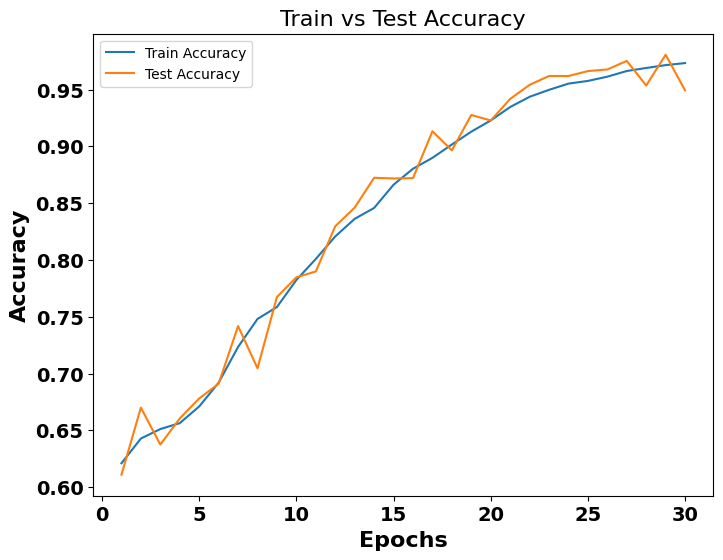

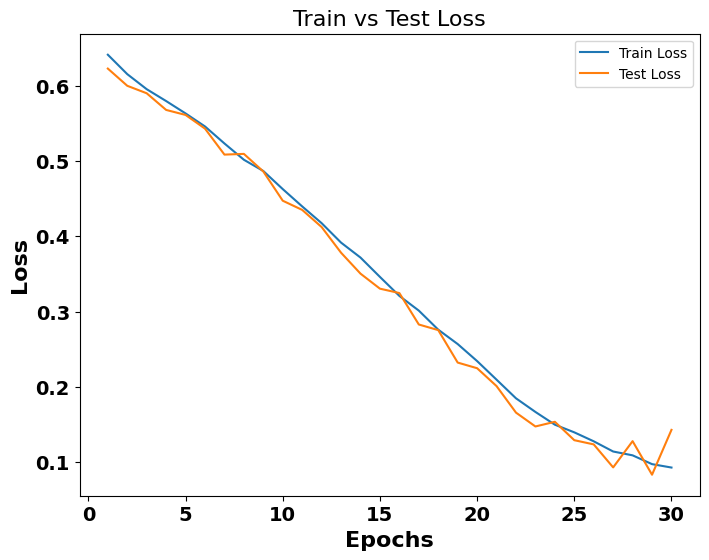

In [62]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, len(train_accuracies) + 1)

# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.title('Train vs Test Accuracy', fontsize=16)
plt.legend()
plt.show()

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('Loss', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.title('Train vs Test Loss', fontsize=16)
plt.legend()
plt.show()


### GRAD CAM

In [63]:
import torch
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

class GradCAM_GNN:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        # Register forward and backward hooks on the target layer
        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_backward_hook(backward_hook))

    def generate_cam(self, data):
        self.model.eval()

        # Forward pass on the single sample
        output = self.model(data)

        # Backward pass to compute gradients
        self.model.zero_grad()
        output.backward()

        # Generate the CAM by multiplying the activations with the gradients
        cam = self.gradients * self.activations  # Shape: [hidden_channels, num_nodes]

        # Average across the channels (feature maps) to get the final CAM per node
        node_cam = cam.mean(dim=0)  # Shape: [num_nodes]

        # Normalize the node CAM to [0, 1]
        node_cam = node_cam - node_cam.min()
        node_cam = node_cam / node_cam.max()

        # Calculate edge importance by averaging the CAM values of the connected nodes
        edge_index = data.edge_index.cpu().numpy()
        edge_cam = []
        for i in range(edge_index.shape[1]):
            src, dst = edge_index[:, i]
            edge_imp = (node_cam[src] + node_cam[dst]) / 2.0  # Averaging node CAMs for the edge
            edge_cam.append(edge_imp.item())

        edge_cam = np.array(edge_cam)

        return node_cam.detach().cpu().numpy(), edge_cam

    def remove_hooks(self):
        for handle in self.hook_handles:
            handle.remove()

# Visualization function for a single sample in 3D using Plotly with color scale
def visualize_human_skeleton_3d_plotly(cam, data, title="3D Grad-CAM Visualization"):
    node_cam, edge_cam = cam
    node_positions = data.x[:, :3].cpu().numpy()  # Assume first 3 columns are X, Y, Z

    # Create a scatter plot for the joints
    scatter = go.Scatter3d(
        x=node_positions[:, 0],
        y=node_positions[:, 1],
        z=node_positions[:, 2],
        mode='markers+text',
        text=[f'{i}' for i in range(node_positions.shape[0])],
        marker=dict(
            size=8,
            color=node_cam,
            colorscale='Viridis',
            colorbar=dict(title="Node Grad-CAM Value", x=0.9),  # Add color bar for node Grad-CAM values
            opacity=0.8
        )
    )

    # Create lines for the edges (bones)
    edge_index = data.edge_index.cpu().numpy()
    edge_x = []
    edge_y = []
    edge_z = []
    edge_colors = []
    for i in range(edge_index.shape[1]):
        src, dst = edge_index[:, i]
        edge_x.extend([node_positions[src, 0], node_positions[dst, 0], None])
        edge_y.extend([node_positions[src, 1], node_positions[dst, 1], None])
        edge_z.extend([node_positions[src, 2], node_positions[dst, 2], None])
        edge_colors.extend([edge_cam[i], edge_cam[i], edge_cam[i]])  # Use the edge importance for coloring

    # Ensure that there are no None values in edge_colors
    edge_colors = np.array(edge_colors)
    edge_colors = np.nan_to_num(edge_colors, nan=0.0)  # Replace None or NaN with 0.0

    lines = go.Scatter3d(
        x=edge_x,
        y=edge_y,
        z=edge_z,
        mode='lines',
        line=dict(
            color=edge_colors,
            colorscale='Viridis',
            width=4,
            colorbar=dict(title="Edge Grad-CAM Value", x=1.05)  # Position the edge color bar separately
        ),
        hoverinfo='none'
    )

    # Combine the scatter plot and lines into a single figure
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
    fig.add_trace(scatter)
    fig.add_trace(lines)

    # Set the layout for better visualization, remove background and ticks
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='X', showgrid=False, backgroundcolor="white", showticklabels=False),
            yaxis=dict(title='Y', showgrid=False, backgroundcolor="white", showticklabels=False),
            zaxis=dict(title='Z', showgrid=False, backgroundcolor="white", showticklabels=False),
            aspectmode='cube',
            bgcolor="white"  # Set overall scene background color to white
        ),
        margin=dict(l=0, r=0, b=0, t=0),
        paper_bgcolor="white",  # Set the background color of the figure
        plot_bgcolor="white",  # Set the background color of the plot area
        title=title,
        showlegend=False
    )

    fig.show()




### GRAD CAM PLOT

In [108]:
data_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Data/pre-processed data/BioAge_class_Kinect_feature_matrix_20240928_221052.csv'



dataframe = pd.read_csv(data_path)
dataframe = dataframe[dataframe['walking_speed'] == "Fast"]




# Specify the patient ID you want to visualize
patient_id = '047-MW'  # Replace with actual patient ID
# Filter the dataset for the specific patient
patient_data = dataframe[dataframe['PatientID'] == patient_id]  # Assuming dataframe has 'patientID' column
patient_dataset = SkeletonDataset(patient_data)

# Create a DataLoader for the specific patient
patient_loader = DataLoader(patient_dataset, batch_size=1, shuffle=False)  # Batch size 1 to load one sample at a time

target_layer = model.gcn2 # Example target layer
grad_cam = GradCAM_GNN(model, target_layer)

# Specify which data points you want to plot
points_to_plot = [80]  # Change this list to include the desired data points

# Loop through the DataLoader and select the specified data points
for i, single_sample in enumerate(patient_loader, 1):  # Start index from 1
    if i in points_to_plot:
        print(f"Visualizing {i}-th data point for patient {patient_id}... and Layer {target_layer}")

        single_sample = single_sample.to(device)

        # Generate and visualize the CAM for this single patient sample
        cam = grad_cam.generate_cam(single_sample)
        visualize_human_skeleton_3d_plotly(cam, single_sample, title=f"Grad-CAM for Patient {patient_id}, Data Point {i}")

# Remove the hooks to clean up
grad_cam.remove_hooks()

Visualizing 80-th data point for patient 047-MW... and Layer GCNConv(128, 128)


/home/iqh4001/.conda/envs/jupyter-notebook/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning:

'data.DataLoader' is deprecated, use 'loader.DataLoader' instead

/home/iqh4001/.conda/envs/jupyter-notebook/lib/python3.10/site-packages/torch/nn/modules/module.py:1352: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.



In [109]:
dataframe

,PatientID,trial_num,walking_speed,timeStamps,PELVIS_X,SPINE_NAVAL_X,SPINE_CHEST_X,NECK_X,CLAVICLE_LEFT_X,SHOULDER_LEFT_X,...,KNEE_RIGHT_Z,ANKLE_RIGHT_Z,FOOT_RIGHT_Z,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,BioAge_class
2,002-RJ,Trial4,Fast,1.904169,233.393391,218.148584,209.678279,211.385989,246.005926,387.225652,...,4564.097426,4560.058414,4426.005815,4405.839311,4238.692549,4261.584199,4372.409521,4262.856073,4387.466380,1
3,001-LO,Trial6,Fast,1.594747,108.628614,101.747139,96.230088,100.388140,116.810257,186.907541,...,4776.770807,4867.600408,4819.558475,4631.685444,4548.005264,4563.049075,4621.956035,4561.222485,4622.543272,1
4,060-CC,Trial3,Fast,4.708234,48.315391,46.790476,44.865775,32.513553,0.506834,-129.882562,...,5784.930544,5692.941614,5815.110383,5545.342243,5590.466688,5543.937783,5497.537798,5548.251535,5493.791967,0
11,065-JH,Trial3,Fast,4.218579,98.317118,86.564565,81.537100,79.556353,43.132918,-102.378853,...,5178.224127,5148.271908,5311.134753,4823.141379,4732.603965,4702.462096,4738.026300,4715.473823,4771.556370,0
12,065-JH,Trial3,Fast,3.419360,57.917240,51.023741,44.572695,31.827043,8.020627,-86.746532,...,4276.246053,4110.464996,4172.146074,4043.245728,3975.245116,3947.434128,3982.011692,3947.371286,3971.998226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,001-LO,Trial4,Fast,0.441217,54.995895,20.154508,-7.057026,-21.345608,13.016171,138.203718,...,6525.177079,6753.682608,6673.036857,6530.106642,6378.643423,6412.154532,6535.469286,6393.356127,6486.602791,1
42280,005-GP,Trial5,Fast,1.608650,678.750270,672.503220,667.018546,674.064713,640.858726,514.083028,...,4369.787545,4543.673581,4678.678816,4023.283228,4153.092675,4128.587634,4048.116029,4119.651213,4007.004593,0
42282,044-MS,Trial4,Fast,1.457507,-520.370334,-535.169644,-548.929908,-551.754841,-505.184297,-312.587350,...,8531.778875,8779.846341,8657.620475,8250.177867,8034.985904,8066.820606,8240.310650,8036.983400,8154.288793,1
42284,029-JC,Trial4,Fast,3.163889,-71.527773,-63.809782,-57.861917,-60.105298,-21.818006,128.614292,...,3542.351868,3666.814208,3490.741503,3444.341707,3274.873055,3281.852058,3380.015718,3292.931991,3422.150984,1


In [110]:
# Specify the patient ID you want to visualize
patient_id = '037-MA'  # Replace with actual patient ID
# Filter the dataset for the specific patient
patient_data = dataframe[dataframe['PatientID'] == patient_id]  # Assuming dataframe has 'patientID' column
patient_dataset = SkeletonDataset(patient_data)

# Create a DataLoader for the specific patient
patient_loader = DataLoader(patient_dataset, batch_size=1, shuffle=False)  # Batch size 1 to load one sample at a time

target_layer = model.gcn2  # Example target layer
grad_cam = GradCAM_GNN(model, target_layer)

# Specify which data points you want to plot
points_to_plot = [80]  # Change this list to include the desired data points

# Loop through the DataLoader and select the specified data points
for i, single_sample in enumerate(patient_loader, 1):  # Start index from 1
    if i in points_to_plot:
        print(f"Visualizing {i}-th data point for patient {patient_id}... and Layer {target_layer}")

        single_sample = single_sample.to(device)

        # Generate and visualize the CAM for this single patient sample
        cam = grad_cam.generate_cam(single_sample)
        visualize_human_skeleton_3d_plotly(cam, single_sample, title=f"Grad-CAM for Patient {patient_id}, Data Point {i}")

# Remove the hooks to clean up
grad_cam.remove_hooks()

/home/iqh4001/.conda/envs/jupyter-notebook/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning:

'data.DataLoader' is deprecated, use 'loader.DataLoader' instead



### Subjectwise Accuracy

Total Rows: 249
Valid Predictions: 236 (94.78%)
Invalid Predictions: 13 (5.22%)

Rows with Invalid predictions:
     row_number  Ground Truth  Vaid Prediction          prediction
21         3651             0              1.0  Invalid Prediction
36         6453             0              1.0  Invalid Prediction
52         9065             0              1.0  Invalid Prediction
53         9141             0              1.0  Invalid Prediction
71        11082             0              1.0  Invalid Prediction
100       14888             0              1.0  Invalid Prediction
106       15886             0              1.0  Invalid Prediction
114       17035             0              1.0  Invalid Prediction
116       17274             0              1.0  Invalid Prediction
125       19618             0              1.0  Invalid Prediction
135       20647             0              1.0  Invalid Prediction
150       22152             0              1.0  Invalid Prediction
182       27593  

/tmp/ipykernel_64198/2049619208.py:274: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/tmp/ipykernel_64198/2049619208.py:275: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



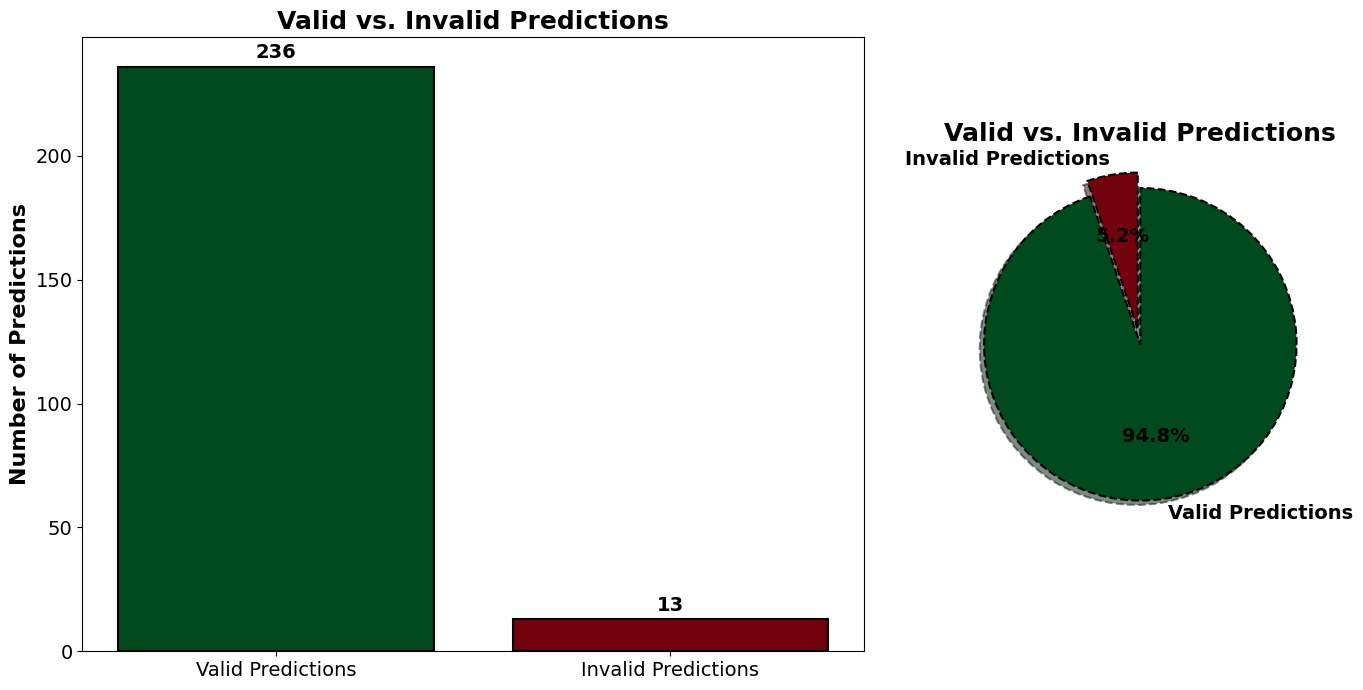

In [111]:
import torch
import pandas as pd
from scipy import stats  # For calculating the mode



import torch
import pandas as pd
from scipy import stats  # For calculating the mode
from tqdm.notebook import tqdm


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader, Dataset, Data
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




patient_id =  '015-IL'







# Define joints and edges
joints = [
    'PELVIS', 'SPINE_NAVAL', 'SPINE_CHEST', 'NECK', 'CLAVICLE_LEFT', 'SHOULDER_LEFT',
    'ELBOW_LEFT', 'WRIST_LEFT', 'HAND_LEFT', 'HANDTIP_LEFT', 'THUMB_LEFT',
    'CLAVICLE_RIGHT', 'SHOULDER_RIGHT', 'ELBOW_RIGHT', 'WRIST_RIGHT', 'HAND_RIGHT',
    'HANDTIP_RIGHT', 'THUMB_RIGHT', 'HIP_LEFT', 'KNEE_LEFT', 'ANKLE_LEFT',
    'FOOT_LEFT', 'HIP_RIGHT', 'KNEE_RIGHT', 'ANKLE_RIGHT', 'FOOT_RIGHT',
    'HEAD', 'NOSE', 'EYE_LEFT', 'EAR_LEFT', 'EYE_RIGHT', 'EAR_RIGHT'
]

edges = [
    ('PELVIS', 'SPINE_NAVAL'), ('SPINE_NAVAL', 'SPINE_CHEST'), ('SPINE_CHEST', 'NECK'),
    ('NECK', 'HEAD'), ('SPINE_CHEST', 'CLAVICLE_LEFT'), ('CLAVICLE_LEFT', 'SHOULDER_LEFT'),
    ('SHOULDER_LEFT', 'ELBOW_LEFT'), ('ELBOW_LEFT', 'WRIST_LEFT'), ('WRIST_LEFT', 'HAND_LEFT'),
    ('HAND_LEFT', 'HANDTIP_LEFT'), ('WRIST_LEFT', 'THUMB_LEFT'), ('SPINE_CHEST', 'CLAVICLE_RIGHT'),
    ('CLAVICLE_RIGHT', 'SHOULDER_RIGHT'), ('SHOULDER_RIGHT', 'ELBOW_RIGHT'), ('ELBOW_RIGHT', 'WRIST_RIGHT'),
    ('WRIST_RIGHT', 'HAND_RIGHT'), ('HAND_RIGHT', 'HANDTIP_RIGHT'), ('WRIST_RIGHT', 'THUMB_RIGHT'),
    ('PELVIS', 'HIP_LEFT'), ('HIP_LEFT', 'KNEE_LEFT'), ('KNEE_LEFT', 'ANKLE_LEFT'),
    ('ANKLE_LEFT', 'FOOT_LEFT'), ('PELVIS', 'HIP_RIGHT'), ('HIP_RIGHT', 'KNEE_RIGHT'),
    ('KNEE_RIGHT', 'ANKLE_RIGHT'), ('ANKLE_RIGHT', 'FOOT_RIGHT'),
    ('HEAD', 'NOSE'),('HEAD','EYE_LEFT'), ('HEAD', 'EYE_RIGHT'), ('HEAD', 'EAR_LEFT'), ('HEAD', 'EAR_RIGHT')
]

joint_to_idx = {joint: idx for idx, joint in enumerate(joints)}

edge_index = torch.tensor(
    [[joint_to_idx[src], joint_to_idx[dst]] for src, dst in edges] +
    [[joint_to_idx[dst], joint_to_idx[src]] for src, dst in edges],  # Bidirectional edges
    dtype=torch.long
).t()



class HybridSTGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(HybridSTGCN, self).__init__()

        # Spatial Graph Convolution Layers
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)

        # Temporal Convolution Layers
        self.temporal_conv1 = nn.Conv1d(in_channels=hidden_channels,
                                        out_channels=hidden_channels,
                                        kernel_size=3, padding=1)

        # LSTM for temporal modeling
        self.lstm = nn.LSTM(hidden_channels, hidden_channels, batch_first=True)

        # Fully Connected Layer
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        batch = getattr(data, 'batch', None)  # Use batch if available, else None

        # Spatial GCN Layers
        x = F.relu(self.gcn1(x, edge_index))
        x = F.relu(self.gcn2(x, edge_index))  # x: [num_nodes*batch_size, hidden_channels]

        # Reshape for Temporal Conv
        if batch is not None:
            batch_size = batch.max().item() + 1
            num_nodes = x.size(0) // batch_size
        else:
            batch_size = 1
            num_nodes = x.size(0)

        x = x.view(batch_size, num_nodes, -1)  # [batch_size, num_nodes, hidden_channels]
        x = x.permute(0, 2, 1)  # [batch_size, hidden_channels, num_nodes]

        # Temporal Conv Layer
        x = F.relu(self.temporal_conv1(x))  # [batch_size, hidden_channels, num_nodes]

        # LSTM for capturing temporal patterns
        x = x.permute(0, 2, 1)  # [batch_size, num_nodes, hidden_channels]
        x, _ = self.lstm(x)  # [batch_size, num_nodes, hidden_channels]

        # Pooling over nodes
        x = x.mean(dim=1)  # [batch_size, hidden_channels]

        # Fully Connected Layer
        x = self.fc(x)  # [batch_size, num_classes]
        x = torch.sigmoid(x)  # For binary classification

        return x.squeeze()  # [batch_size]





data_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Dataset/Data/pre-processed data/BioAge_class_Kinect_feature_matrix_20240928_221052.csv'


#data_path = '/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/Final_data_Balanced.csv'



dataframe = pd.read_csv(data_path)
dataframe = dataframe[dataframe['walking_speed'] == "Fast"]
# Load the saved model
model_save_path = '/home/iqh4001/Iqram_WCM/MADE Lab/Kinect Project/Code/Models/BioAge_hybrid_stgcn_model_20240928_222049.pth'






device = torch.device('cpu')

# Load the saved model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = HybridSTGCN(in_channels=4, hidden_channels=128, num_classes=1).to(device)
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set model to evaluation mode












# Function to prepare a single row for prediction
def prepare_single_row_for_prediction(row):
    # Extract node features
    node_features = []
    for joint in joints:
        x = row[f'{joint}_X']
        y = row[f'{joint}_Y']
        z = row[f'{joint}_Z']
        timestamp = row['timeStamps']  # Include timestamp as a feature
        node_features.append([x, y, z, timestamp])

    x = torch.tensor(node_features, dtype=torch.float)  # Shape: [num_nodes, 4]

    # Actual frailty_class (if available)
    y = torch.tensor(row['BioAge_class'], dtype=torch.float)

    # Create a Data object
    data = Data(x=x, edge_index=edge_index, y=y)

    return data.to(device)

# Function to predict frailty for all rows of a single patient and show detailed results
def predict_single_patient_frailty(dataframe, patient_id):
    # Filter the dataframe for the specific patient
    patient_data = dataframe[dataframe['PatientID'] == patient_id]

    # Create a list to store results
    results = []

    # Store correct and wrong prediction counts
    correct_predictions = 0
    wrong_predictions = 0

    # Iterate over each row corresponding to the patient
    for idx, row in patient_data.iterrows():
        single_sample = prepare_single_row_for_prediction(row)

        # Run the model to make a prediction
        with torch.no_grad():
            output = model(single_sample)

        # Convert the output to binary prediction (frailty or non-frailty based on threshold 0.5)
        predicted_frailty = (output >= 0.5).float().item()

        # Get the actual frailty class
        actual_frailty_class = row['BioAge_class']

        # Compare actual frailty with the predicted frailty
        if actual_frailty_class == predicted_frailty:
            prediction_status = "Valid Prediction"
            correct_predictions += 1
        else:
            prediction_status = "Invalid Prediction"
            wrong_predictions += 1

        # Append the results for this row
        results.append({
            'row_number': idx,
            'Ground Truth': actual_frailty_class,
            'Vaid Prediction': predicted_frailty,
            'prediction': prediction_status
        })

    # Convert the results into a pandas DataFrame
    results_df = pd.DataFrame(results)

    # Calculate total number of rows, correct and wrong prediction percentages
    total_rows = len(patient_data)
    right_percentage = (correct_predictions / total_rows) * 100 if total_rows > 0 else 0
    wrong_percentage = (wrong_predictions / total_rows) * 100 if total_rows > 0 else 0

    print(f'Total Rows: {total_rows}')
    print(f'Valid Predictions: {correct_predictions} ({right_percentage:.2f}%)')
    print(f'Invalid Predictions: {wrong_predictions} ({wrong_percentage:.2f}%)')

    # Display rows where the predictions were wrong
    wrong_predictions_df = results_df[results_df['prediction'] == "Invalid Prediction"]
    print(f"\nRows with Invalid predictions:\n{wrong_predictions_df}")

    return results_df, wrong_predictions_df




# Run the prediction for the specified patient and get the results
results_df, wrong_predictions_df = predict_single_patient_frailty(dataframe, patient_id)

# Display the full DataFrame
#results_df

# Optionally, save the results and wrong predictions to CSV files
# results_df.to_csv('frailty_predictions_single_patient.csv', index=False)
# wrong_predictions_df.to_csv('wrong_predictions_single_patient.csv', index=False)



import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

def plot_both_charts(results_df, valid_color='green', invalid_color='red'):
    # Count the number of valid and invalid predictions
    valid_count = len(results_df[results_df['prediction'] == "Valid Prediction"])
    invalid_count = len(results_df[results_df['prediction'] == "Invalid Prediction"])

    # Data
    labels = ['Valid Predictions', 'Invalid Predictions']
    counts = [valid_count, invalid_count]

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})

    # Color maps for gradient effect
    valid_gradient = cm.get_cmap('Greens', 256)
    invalid_gradient = cm.get_cmap('Reds', 256)
    
    # Generate gradient colors
    valid_gradient_colors = valid_gradient(range(100, 256, 50))
    invalid_gradient_colors = invalid_gradient(range(100, 256, 50))

    # Bar chart with gradient
    bars = ax[0].bar(labels, counts, color=[valid_gradient_colors[-1], invalid_gradient_colors[-1]], edgecolor='black', linewidth=1.5)

    # Remove grid from the bar chart
    ax[0].set_title('Valid vs. Invalid Predictions', fontweight='bold', fontsize=18)
    ax[0].set_ylabel('Number of Predictions', fontweight='bold', fontsize=16)

    # Customize ticks for the bar chart
    ax[0].tick_params(axis='x', labelsize=14)
    ax[0].tick_params(axis='y', labelsize=14)
    
    # Add value labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax[0].annotate(f'{int(height)}', 
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # Offset label position slightly above the bar
                       textcoords="offset points",
                       ha='center', va='bottom', fontweight='bold', fontsize=14, color='black')

    # Pie chart with 3D effect (wedges)
    wedges, texts, autotexts = ax[1].pie(counts, labels=labels, colors=[valid_gradient_colors[-1], invalid_gradient_colors[-1]],
                                        autopct=lambda p: f'{p:.1f}%', startangle=90, counterclock=False, 
                                        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': '--'}, 
                                        shadow=True, explode=[0, 0.1], textprops={'fontsize': 14, 'fontweight': 'bold'})
    
    # Set title and formatting for pie chart
    ax[1].set_title('Valid vs. Invalid Predictions', fontweight='bold', fontsize=18)

    # Make pie chart labels bold
    for text in autotexts:
        text.set_fontweight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()


# Call the function with customizable colors
plot_both_charts(results_df, valid_color='#015000', invalid_color='#500000')

### Total Cohort Accuracy (Subjectwise)

Processing patients:   0%|          | 0/36 [00:00<?, ?it/s]

Total Rows: 924
Valid Predictions: 845 (91.45%)
Invalid Predictions: 79 (8.55%)

Rows with Invalid predictions:
     row_number  Ground Truth  Vaid Prediction          prediction
32         1243             1              0.0  Invalid Prediction
50         2076             1              0.0  Invalid Prediction
59         2373             1              0.0  Invalid Prediction
78         3526             1              0.0  Invalid Prediction
80         3559             1              0.0  Invalid Prediction
..          ...           ...              ...                 ...
880       40651             1              0.0  Invalid Prediction
881       40727             1              0.0  Invalid Prediction
889       41007             1              0.0  Invalid Prediction
902       41325             1              0.0  Invalid Prediction
904       41370             1              0.0  Invalid Prediction

[79 rows x 4 columns]
Total Rows: 959
Valid Predictions: 959 (100.00%)
Invalid Pred

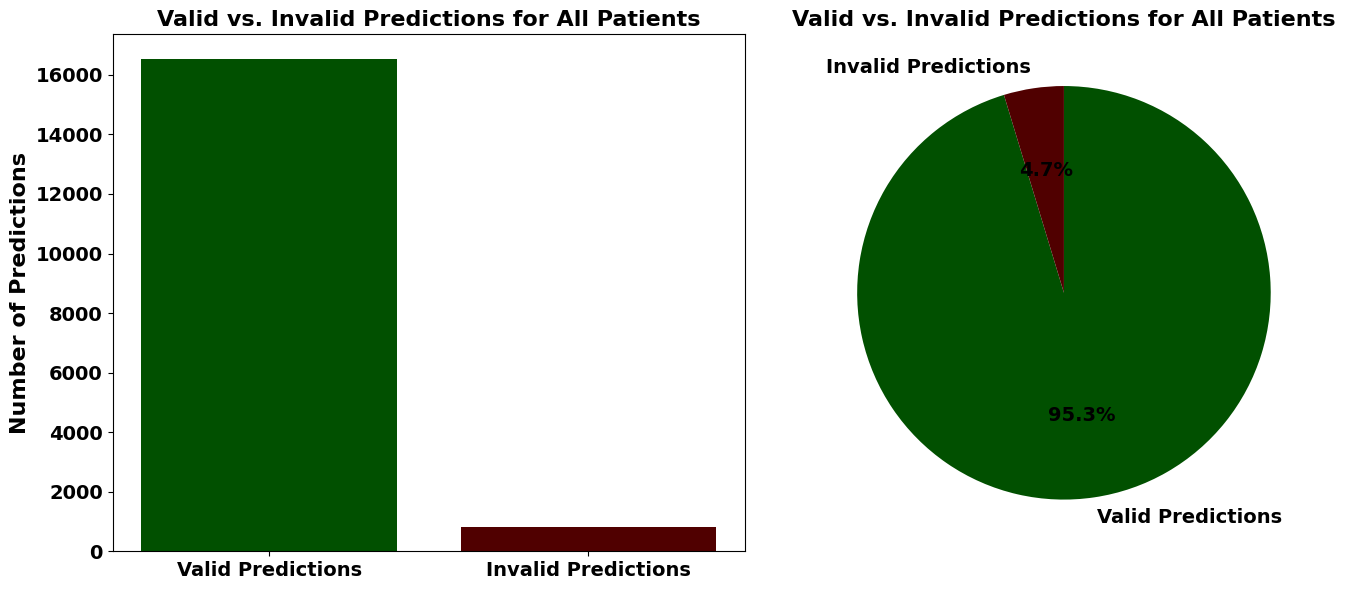

In [112]:
# Function to predict frailty for all patients and aggregate the results
def predict_all_patients_frailty(dataframe):
    # Get a list of unique patient IDs
    patient_ids = dataframe['PatientID'].unique()

    # Initialize counters for valid and invalid predictions
    total_valid_predictions = 0
    total_invalid_predictions = 0
    total_rows = 0

    # Create a DataFrame to store all results
    all_results = []

    # Iterate over all patient IDs
    for patient_id in tqdm(patient_ids, desc="Processing patients"):
        # Run the prediction for each patient
        results_df, _ = predict_single_patient_frailty(dataframe, patient_id)

        # Aggregate the results for the patient
        valid_predictions = len(results_df[results_df['prediction'] == "Valid Prediction"])
        invalid_predictions = len(results_df[results_df['prediction'] == "Invalid Prediction"])
        total_rows += len(results_df)

        # Update overall counts
        total_valid_predictions += valid_predictions
        total_invalid_predictions += invalid_predictions

        # Store the results for all patients
        all_results.append(results_df)

    # Calculate the percentages
    valid_percentage = (total_valid_predictions / total_rows) * 100 if total_rows > 0 else 0
    invalid_percentage = (total_invalid_predictions / total_rows) * 100 if total_rows > 0 else 0

    print(f'Total Rows: {total_rows}')
    print(f'Valid Predictions: {total_valid_predictions} ({valid_percentage:.2f}%)')
    print(f'Invalid Predictions: {total_invalid_predictions} ({invalid_percentage:.2f}%)')

    # Return the overall results
    return total_valid_predictions, total_invalid_predictions


# Function to predict frailty for all patients and aggregate the results
def predict_all_patients_frailty_sep(dataframe):
    # Get a list of unique patient IDs
    patient_ids = dataframe['PatientID'].unique()

    # Create a dictionary to store valid and invalid predictions for each patient
    patient_results = {}

    # Iterate over all patient IDs
    for patient_id in tqdm(patient_ids, desc="Processing patients"):
        # Run the prediction for each patient
        results_df, _ = predict_single_patient_frailty(dataframe, patient_id)

        # Count valid and invalid predictions
        valid_predictions = len(results_df[results_df['prediction'] == "Valid Prediction"])
        invalid_predictions = len(results_df[results_df['prediction'] == "Invalid Prediction"])

        # Store the results for the current patient
        patient_results[patient_id] = {
            'valid': valid_predictions,
            'invalid': invalid_predictions
        }

    return patient_results




# Function to plot the aggregated predictions for all patients
def plot_aggregated_predictions(total_valid_predictions, total_invalid_predictions, valid_color='green', invalid_color='red'):
    # Data
    labels = ['Valid Predictions', 'Invalid Predictions']
    counts = [total_valid_predictions, total_invalid_predictions]
    colors = [valid_color, invalid_color]

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Bar chart
    ax[0].bar(labels, counts, color=colors)
    ax[0].set_title('Valid vs. Invalid Predictions for All Patients', fontweight='bold', fontsize=16)
    ax[0].set_ylabel('Number of Predictions', fontweight='bold', fontsize=16)

    # Customize ticks for the bar chart
    ax[0].tick_params(axis='x', labelsize=14)
    ax[0].tick_params(axis='y', labelsize=14)

    # Make the ticks bold
    for tick in ax[0].get_xticklabels() + ax[0].get_yticklabels():
        tick.set_fontweight('bold')

    # Pie chart
    ax[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
              counterclock=False, textprops={'fontsize': 14, 'fontweight': 'bold'})
    ax[1].set_title('Valid vs. Invalid Predictions for All Patients', fontweight='bold', fontsize=16)

    # Display the plot
    plt.tight_layout()
    plt.show()


import math
import matplotlib.pyplot as plt

# Function to plot valid and invalid predictions for each subject in a square grid
def plot_predictions_for_each_subject_square_grid(patient_results, valid_color='green', invalid_color='red'):
    # Get the number of subjects
    num_patients = len(patient_results)

    # Calculate the number of rows and columns for the square grid
    grid_size = math.ceil(math.sqrt(num_patients))  # To ensure a square-like grid

    # Set up the figure with subplots in a square grid layout
    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(grid_size * 5, grid_size * 5))

    # Flatten axes for easier iteration (to handle grids with multiple rows/columns)
    axes = axes.flatten()

    # Iterate over each patient and plot the results
    for idx, (patient_id, results) in enumerate(patient_results.items()):
        valid_count = results['valid']
        invalid_count = results['invalid']

        # Data for plotting
        labels = ['Valid', 'Invalid']
        counts = [valid_count, invalid_count]
        colors = [valid_color, invalid_color]

        # Bar chart for each patient
        axes[idx].bar(labels, counts, color=colors)
        axes[idx].set_title(f'{patient_id}: Valid vs. Invalid', fontsize=14, fontweight='bold')
        axes[idx].set_ylabel('Number of Predictions', fontsize=12)
        axes[idx].tick_params(axis='x', labelsize=10)
        axes[idx].tick_params(axis='y', labelsize=10)

    # Remove any unused subplots (if any)
    for i in range(num_patients, grid_size * grid_size):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()


import math
import matplotlib.pyplot as plt

# Function to plot valid and invalid predictions for each subject in a square grid
def plot_predictions_for_each_subject_square_grid(patient_results, valid_color='green', invalid_color='red'):
    # Get the number of subjects
    num_patients = len(patient_results)

    # Calculate the number of rows and columns for the square grid
    grid_size = math.ceil(math.sqrt(num_patients))  # To ensure a square-like grid

    # Set up the figure with subplots in a square grid layout
    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(grid_size * 5, grid_size * 5))

    # Flatten axes for easier iteration (to handle grids with multiple rows/columns)
    axes = axes.flatten()

    # Iterate over each patient and plot the results
    for idx, (patient_id, results) in enumerate(patient_results.items()):
        valid_count = results['valid']
        invalid_count = results['invalid']

        # Data for plotting
        labels = ['Valid', 'Invalid']
        counts = [valid_count, invalid_count]
        colors = [valid_color, invalid_color]

        # Bar chart for each patient
        axes[idx].bar(labels, counts, color=colors)
        axes[idx].set_title(f'{patient_id}: Valid vs. Invalid', fontsize=14, fontweight='bold')
        axes[idx].set_ylabel('Number of Predictions', fontsize=12)
        axes[idx].tick_params(axis='x', labelsize=10)
        axes[idx].tick_params(axis='y', labelsize=10)

    # Remove any unused subplots (if any)
    for i in range(num_patients, grid_size * grid_size):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()





# Run the prediction for all patients and get the aggregated results
total_valid_predictions, total_invalid_predictions = predict_all_patients_frailty(dataframe)

# Plot the aggregated predictions
plot_aggregated_predictions(total_valid_predictions, total_invalid_predictions, valid_color='#015000', invalid_color='#500000')

### Subjectwise Accuracy

In [ ]:
from collections import defaultdict
import torch.nn.functional as F
import pandas as pd

model.eval()

# To store all test predictions, true labels, and outputs
patient_results = defaultdict(list)

with torch.no_grad():
    for i in range(len(test_dataset)):
        data = test_dataset[i]
        patient_id = dataframe.iloc[test_dataset.indices[i]]['patientID']
        true_label = data.y.item()

        data = data.to(device)
        output = model(data)
        prob = torch.sigmoid(output).item()
        pred_label = int(prob >= 0.5)

        patient_results[patient_id].append({
            'pred': pred_label,
            'true': int(true_label),
            'prob': prob
        })

# Summarize per-patient
summary = []

for pid, records in patient_results.items():
    preds = [r['pred'] for r in records]
    trues = [r['true'] for r in records]
    probs = [r['prob'] for r in records]

    correct_count = sum([p == t for p, t in zip(preds, trues)])
    total = len(records)
    valid_percentage = 100 * correct_count / total
    invalid_percentage = 100 - valid_percentage

    summary.append({
        'PatientID': pid,
        'Predicted_QoR_class': max(set(preds), key=preds.count),  # majority
        'Actual_QoR_class': max(set(trues), key=trues.count),    # majority
        'valid_percentage': round(valid_percentage, 6),
        'invalid_percentage': round(invalid_percentage, 6),
        'average_model_output': round(sum(probs) / len(probs), 6)
    })

# Convert to DataFrame
report_df = pd.DataFrame(summary)

# Optional: sort by PatientID or any metric
report_df.sort_values(by='PatientID', inplace=True)

# Display or save
from IPython.display import display
display(report_df)

# Save to CSV
report_df.to_csv("QoR_Per_Patient_Report.csv", index=False)
print("✅ Report saved as 'QoR_Per_Patient_Report.csv'")


Processing patients: 100%|██████████| 36/36 [00:36<00:00,  1.00s/it]


,PatientID,phenoage_advance_class,actual_BioAge_class,actual_FFI_class,valid_percentage,invalid_percentage,average_model_output
0,002-RJ,1,1,2.0,91.450216,8.549784,0.873687
1,001-LO,1,1,1.0,100.000000,0.000000,0.999946
2,060-CC,0,0,1.0,100.000000,0.000000,0.009221
3,065-JH,0,0,1.0,98.175182,1.824818,0.087484
4,052-EF,0,0,2.0,100.000000,0.000000,0.025683
5,028-DF,0,0,1.0,99.282297,0.717703,0.047270
6,017-CS,0,0,0.0,100.000000,0.000000,0.034676
7,012-JM,1,1,0.0,89.134126,10.865874,0.852835
8,029-JC,1,1,1.0,78.571429,21.428571,0.697010
9,035-LT,1,1,2.0,96.096096,3.903904,0.943958
